In [ ]:
#First we import and load all basic libraries
from google.colab import drive # For linking colab to Google Drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from pandas.api.types import CategoricalDtype
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
drive.mount('mydrive') #Bridge to Google Drive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AX4XfWhi_I1m2pfdO2GtWs_xYOqNvFvep0fjnWujdc77UnAhRcqIMi1MApc
Mounted at mydrive


In [6]:
wbr = pd.read_csv ("/content/mydrive/MyDrive/EDEM/PEP/WBR_11_12_denormalized_temp.csv", sep= ";", decimal = ",") #Load data
wbr #Visualise dataframe


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp_celsius,windspeed_kh,atemp,hum,casual,registered,cnt
0,1,01/01/2011,1,0,1,0,6,0,2,14.110847,10.749882,0.363625,80.5833,331,654,985
1,2,02/01/2011,1,0,1,0,0,0,2,14.902598,16.652113,0.353739,69.6087,131,670,801
2,3,03/01/2011,1,0,1,0,1,1,1,8.050924,16.636703,0.189405,43.7273,120,1229,1349
3,4,04/01/2011,1,0,1,0,2,1,1,8.200000,10.739832,0.212122,59.0435,108,1454,1562
4,5,05/01/2011,1,0,1,0,3,1,1,9.305237,12.522300,0.229270,43.6957,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,27/12/2012,1,1,12,0,4,1,2,10.420847,23.458911,0.226642,65.2917,247,1867,2114
727,728,28/12/2012,1,1,12,0,5,1,2,10.386653,10.416557,0.255046,59.0000,644,2451,3095
728,729,29/12/2012,1,1,12,0,6,0,2,10.386653,8.333661,0.242400,75.2917,159,1182,1341
729,730,30/12/2012,1,1,12,0,0,0,1,10.489153,23.500518,0.231700,48.3333,364,1432,1796


In [7]:
wbr.loc [(wbr["season"] == 1), "season_cat"] = "Winter" #loc es de location
wbr.loc [(wbr["season"] == 2), "season_cat"] = "Spring"
wbr.loc [(wbr["season"] == 3), "season_cat"] = "Summer"
wbr.loc [(wbr["season"] == 4), "season_cat"] = "Fall"

pd.crosstab(wbr.season, wbr.season_cat)

season_cat,Fall,Spring,Summer,Winter
season,,,,
1,0,0,0,181
2,0,184,0,0
3,0,0,188,0
4,178,0,0,0


In [8]:
wbr.groupby('season_cat').cnt.mean()

cnt_inv=wbr.loc[wbr.season_cat=="Winter", "cnt"]
cnt_prim=wbr.loc[wbr.season_cat=="Spring", "cnt"]
cnt_ver=wbr.loc[wbr.season_cat=="Summer", "cnt"]
cnt_oton=wbr.loc[wbr.season_cat=="Fall", "cnt"]

res = stats.f_oneway(cnt_inv,cnt_prim, cnt_ver, cnt_oton)
print(res)

my_categories=["Summer", "Fall", "Winter", "Spring"]
#Step 2: Define new data type
my_season= CategoricalDtype(categories=my_categories, ordered=True) # hacemos nuevos datos que los datos son de CategoricalDtype y los datos es lo q ue esta en brackets. Importante decir que la lista es true para que este ordenada.
# Second create a new categorical_ordered variable using our specific data type
wbr["season_cat_2"] = wbr.season_cat.astype(my_season)

F_onewayResult(statistic=128.76962156570784, pvalue=6.720391362913176e-67)


Text(0.5, 1.0, 'Figure 1. Average rentals by Weather Season.\n')

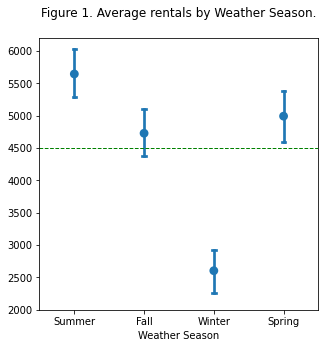

In [9]:
plt.figure(figsize=(5,5))
ax = sns.pointplot(x="season_cat_2", y="cnt", data=wbr, capsize=0.05, ci=99.9, join=0)
ax.set_ylabel('')
plt.yticks(np.arange(1000, 7000, step=500))
plt.ylim(2000,6200)
plt.axhline(y=wbr.cnt.mean(), linewidth=1, linestyle= 'dashed',color="green")
props = dict(boxstyle='round', facecolor='white', lw=0.5)

plt.xlabel('Weather Season')
plt.title('Figure 1. Average rentals by Weather Season.''\n')
